In [1]:
# Migration Networks


In [2]:
# run this from a terminal, to install the packet:
#pip install geopy
import geopy
import pandas as pd
from geopy.geocoders import Nominatim
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from os.path import join
#this will allow the plot to be inline in the browser
%matplotlib inline

In [4]:
commuting_flows = pd.read_csv('ca_flows_df.csv')
commuting_flows = commuting_flows.dropna()

In [5]:
commuting_flows.head()

,Origin,Destination,Origin State,Destination State,Flow,Error,Origin Lat,Origin Lon,Dest Lat,Dest Lon
0,Ada County,Alameda County,Idaho,California,169.0,157.0,43.447861,116.244456,37.648081,121.913304
1,Ada County,Contra Costa County,Idaho,California,16.0,26.0,43.447861,116.244456,37.919479,121.951543
2,Ada County,Los Angeles County,Idaho,California,48.0,48.0,43.447861,116.244456,34.196398,118.261862
3,Ada County,Orange County,Idaho,California,21.0,36.0,43.447861,116.244456,33.675687,117.777207
4,Ada County,Riverside County,Idaho,California,10.0,20.0,43.447861,116.244456,33.729828,116.002239


In [6]:
commuting_flows.tail()

,Origin,Destination,Origin State,Destination State,Flow,Error,Origin Lat,Origin Lon,Dest Lat,Dest Lon
6381,Yuma County,San Bernardino County,Arizona,California,54.0,49.0,32.773942,113.910905,34.857220,116.181197
6382,Yuma County,San Diego County,Arizona,California,96.0,86.0,32.773942,113.910905,33.023604,116.776117
6383,Yuma County,Sonoma County,Arizona,California,14.0,18.0,32.773942,113.910905,38.532574,122.945194
6384,Yuma County,Tuolumne County,Arizona,California,5.0,7.0,32.773942,113.910905,38.021451,119.964708
6385,Yuma County,Ventura County,Arizona,California,26.0,30.0,32.773942,113.910905,34.358742,119.133143


In [7]:
pos={}
g = nx.DiGraph()
for index, row in commuting_flows.iterrows():
    #print(commuting_flows['Origin'][index], commuting_flows['Destination'][index],commuting_flows['Flow'][index])
    if commuting_flows['Origin'][index] not in pos.keys():
        pos[commuting_flows['Origin'][index]] = (commuting_flows['Origin Lon'][index]*-1.0,commuting_flows['Origin Lat'][index])
    if commuting_flows['Destination'][index] not in pos.keys():    
        pos[commuting_flows['Destination'][index]] = (commuting_flows['Dest Lon'][index]*-1.0,commuting_flows['Dest Lat'][index])
    if commuting_flows['Origin'][index]!=commuting_flows['Destination'][index]:
        g.add_edge(commuting_flows['Origin'][index],commuting_flows['Destination'][index],weight=commuting_flows['Flow'][index])    
                

In [8]:
g.number_of_nodes()

850

In [9]:
g.number_of_edges()

5591

In [25]:
i = commuting_flows[commuting_flows['Destination State'] == 'California']
q = i[i['Flow'] > 50000]
p = q[q['Origin'] != q['Destination']]
p

,Origin,Destination,Origin State,Destination State,Flow,Error,Origin Lat,Origin Lon,Dest Lat,Dest Lon
108,Alameda County,San Francisco County,California,California,92246.0,2228.0,37.648081,121.913304,37.727239,123.032229
113,Alameda County,Santa Clara County,California,California,70878.0,1736.0,37.648081,121.913304,37.220777,121.690622
745,Contra Costa County,Alameda County,California,California,100160.0,2294.0,37.919479,121.951543,37.648081,121.913304
825,Contra Costa County,San Francisco County,California,California,58089.0,1975.0,37.919479,121.951543,37.727239,123.032229
2455,Los Angeles County,Orange County,California,California,185878.0,3199.0,34.196398,118.261862,33.675687,117.777207
2495,Los Angeles County,San Bernardino County,California,California,54570.0,1749.0,34.196398,118.261862,34.857220,116.181197
3435,Orange County,Los Angeles County,California,California,185058.0,2805.0,33.675687,117.777207,34.196398,118.261862
3956,Riverside County,Los Angeles County,California,California,51975.0,1761.0,33.729828,116.002239,34.196398,118.261862
3990,Riverside County,Orange County,California,California,73342.0,2421.0,33.729828,116.002239,33.675687,117.777207
4017,Riverside County,San Bernardino County,California,California,97000.0,2193.0,33.729828,116.002239,34.857220,116.181197


In [42]:
c_k = list(nx.clustering(g).values())
n_k = [val for (node, val) in g.degree()]

Text(0, 0.5, 'C(k) Clustering Coeff. of Node k')

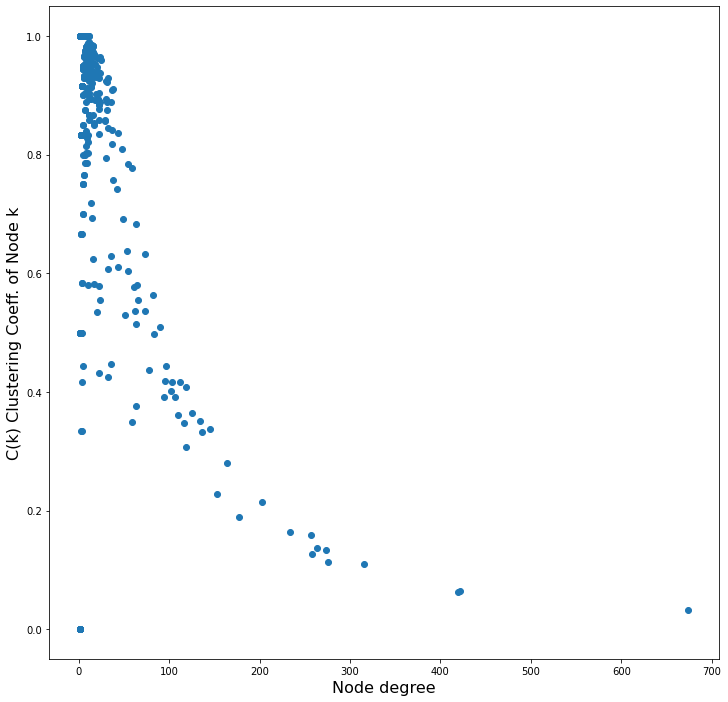

In [44]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(n_k, c_k)
plt.xlabel("Node degree",fontsize=16)
plt.ylabel("C(k) Clustering Coeff. of Node k", fontsize=16)

<ipython-input-45-0f0520330346>:12: RuntimeWarning: invalid value encountered in true_divide
  avg_w = sums/counts;


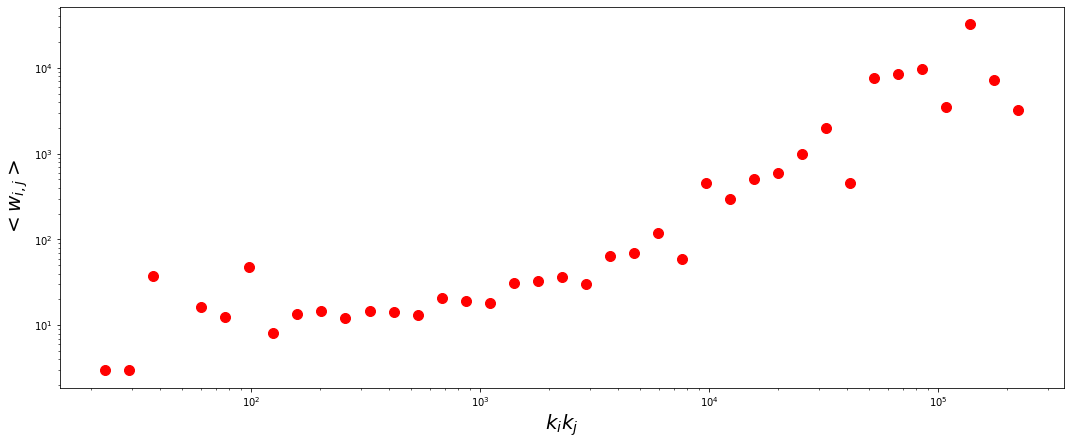

In [45]:
kk = []
wij = []
degrees = g.degree()
for n in g.nodes(data=True):
    for e in g.edges(n[0],data=True):
        kk.append(degrees[e[0]]*degrees[e[1]])
        wij.append(g[e[0]][e[1]]['weight'])
n_bins = 40
kk_logBins = np.logspace(np.log10(min(kk)), np.log10(max(kk)),num=n_bins)
counts, bins = np.histogram(kk, bins=kk_logBins);
sums, bins = np.histogram(kk, bins=kk_logBins,weights=wij);
avg_w = sums/counts;
fig, ax = plt.subplots()
fig.set_size_inches((18, 7))
ax.loglog(bins[:-1],avg_w,linewidth=0,color='r',marker='o',markersize=10)
ax.set_xlabel('$k_ik_j$',fontsize=20)
ax.set_ylabel('$<w_{i,j}>$',fontsize=20)
plt.savefig("commutes_directed_.eps",dpi=200,bbox_inches='tight')